In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
import matplotlib
# 패키지 불러오기
from sklearn.linear_model import Ridge, Lasso, ElasticNet
#from sklearn.tree import export_graphviz  환경 설정하기 어려움
#import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# 나무 구조 시각화  
from sklearn.tree import plot_tree
# 예측 / 회귀 random forest
from sklearn.ensemble import RandomForestRegressor
matplotlib.rc('font', family = 'Malgun Gothic') 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import scale, minmax_scale, robust_scale

#평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)
matplotlib.rc('font', family = 'Malgun Gothic') 

from scipy.stats import chi2_contingency
from scipy import stats

# 로지스틱 회귀
from statsmodels.api import Logit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
Ox_data = pd.read_csv("C:/Users/USER/Desktop/반도체 공정/데이터/Oxidation.CSV",encoding='euc-kr')
Ox_data

,Unnamed: 0,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num,Datetime
0,0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,13,28,01-03-2019
1,1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137,714.295,13,29,01-03-2019
2,2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116,710.114,13,30,01-03-2019
3,3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143,710.617,13,31,01-03-2019
4,4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76,711.632,13,32,01-03-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1699,NOLSM8483211,3,Oxidation,wet,1275.182502,H2O,45.10,0.214,21,715.498,32,11,28-02-2019
1700,1700,NOLSM8493212,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22,707.179,32,12,28-02-2019
1701,1701,NOLSM8503213,1,Oxidation,wet,1279.160563,H2O,45.12,0.214,21,712.946,32,13,28-02-2019
1702,1702,NOLSM8513214,1,Oxidation,wet,1272.804948,H2O,45.34,0.213,20,711.987,32,14,28-02-2019


In [14]:
Ox_data.isnull().sum()

Unnamed: 0    0
No_Die        0
Ox_Chamber    0
process       0
type          0
Temp_OXid     0
Vapor         0
ppm           0
Pressure      0
Oxid_time     0
thickness     0
Lot_Num       0
Wafer_Num     0
Datetime      0
dtype: int64

In [25]:
Ox_data.describe()

,Unnamed: 0,Ox_Chamber,Temp_OXid,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num
count,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000
mean,851.500000,1.952465,1069.505134,33.434173,0.210747,98.392019,711.019512,16.281690,27.394366
std,492.046746,0.812826,149.790056,8.078535,0.009245,72.350780,7.993529,9.114164,15.586611
min,0.000000,1.000000,862.011276,21.070000,0.180000,-6.000000,681.435000,1.000000,1.000000
25%,425.750000,1.000000,889.549749,26.110000,0.204000,31.000000,706.930000,8.000000,14.000000
50%,851.500000,2.000000,1075.160409,33.675000,0.212000,85.000000,711.690500,16.000000,27.500000
75%,1277.250000,3.000000,1192.077105,39.510000,0.217000,147.000000,715.478000,24.000000,41.000000
max,1703.000000,3.000000,1348.471208,49.910000,0.229000,291.000000,737.402000,32.000000,54.000000


<AxesSubplot:>

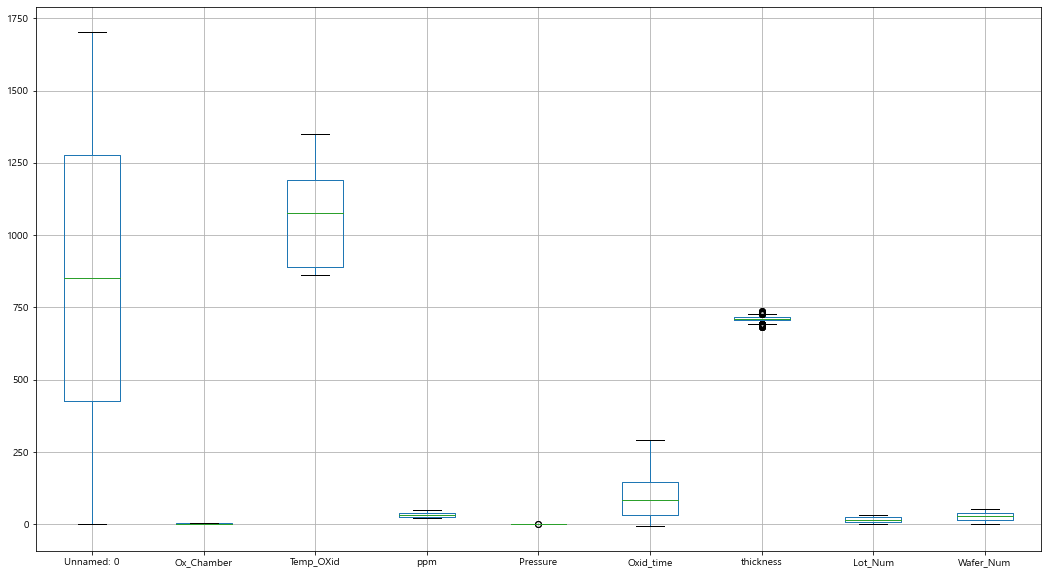

In [44]:
Ox_data.boxplot(figsize= (18,10))

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Ox_Chamber'}>,
        <AxesSubplot:title={'center':'Temp_OXid'}>],
       [<AxesSubplot:title={'center':'ppm'}>,
        <AxesSubplot:title={'center':'Pressure'}>,
        <AxesSubplot:title={'center':'Oxid_time'}>],
       [<AxesSubplot:title={'center':'thickness'}>,
        <AxesSubplot:title={'center':'Lot_Num'}>,
        <AxesSubplot:title={'center':'Wafer_Num'}>]], dtype=object)

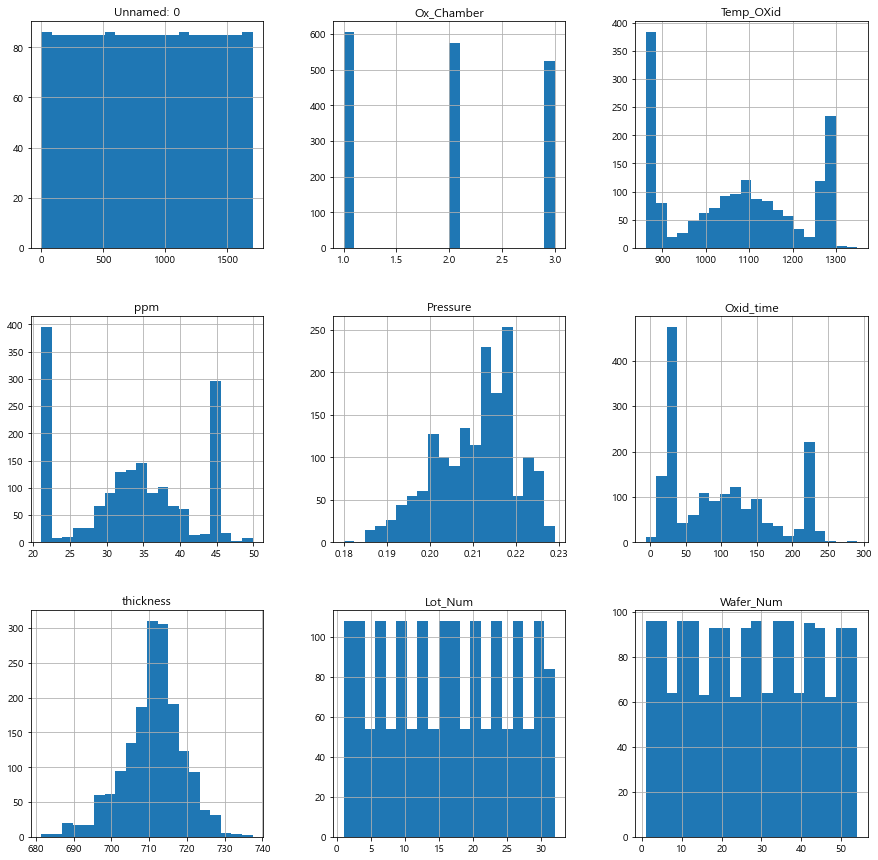

In [46]:
Ox_data.hist(bins  = 20, figsize = (15, 15))

<AxesSubplot:>

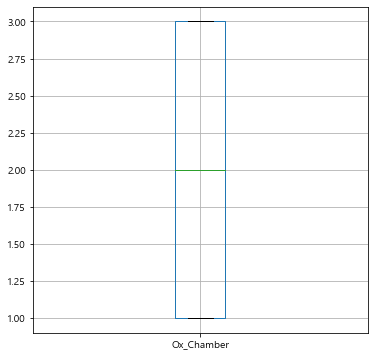

In [16]:
Ox_data.boxplot('Ox_Chamber',figsize= (6,6))

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ox_Chamber', ylabel='count'>

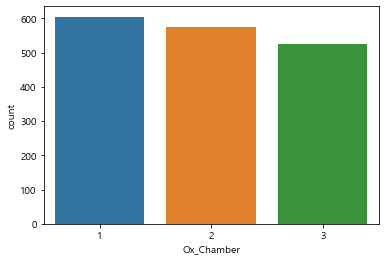

In [36]:
sns.countplot(Ox_data['Ox_Chamber'])

<AxesSubplot:>

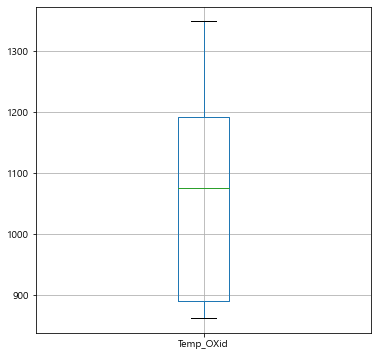

In [17]:
Ox_data.boxplot('Temp_OXid',figsize= (6,6))  # 공정 수행되는 동안의 온도

Text(0.5, 1.0, 'Temp_OXid')

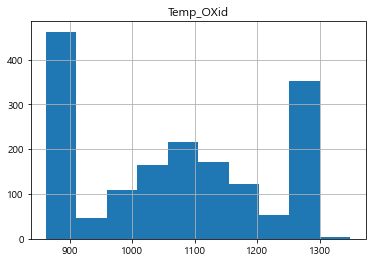

In [47]:
Ox_data['Temp_OXid'].hist()
plt.title('Temp_OXid')

<AxesSubplot:>

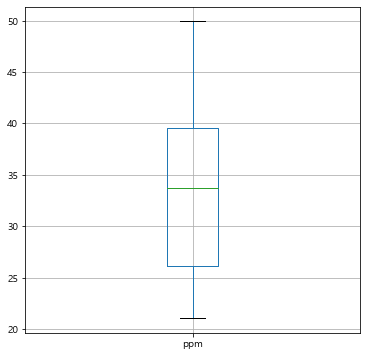

In [18]:
Ox_data.boxplot('ppm',figsize= (6,6)) # 공정에 투여되는 합성물의 량 

<AxesSubplot:>

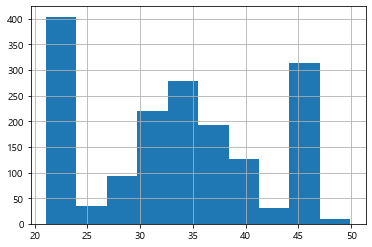

In [39]:
Ox_data['ppm'].hist()

<AxesSubplot:>

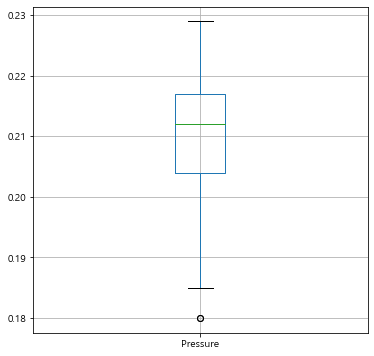

In [19]:
Ox_data.boxplot('Pressure',figsize= (6,6)) # 공정에 가해지는 압력

<AxesSubplot:>

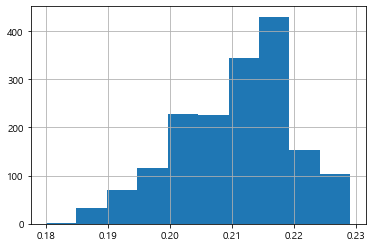

In [26]:
Ox_data['Pressure'].hist()

<AxesSubplot:>

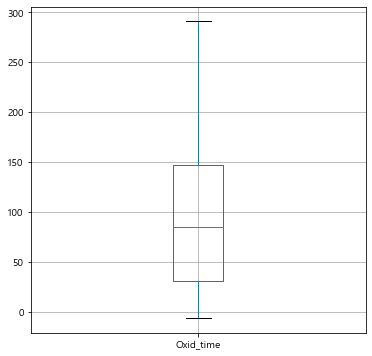

In [20]:
Ox_data.boxplot('Oxid_time',figsize= (6,6))

<AxesSubplot:>

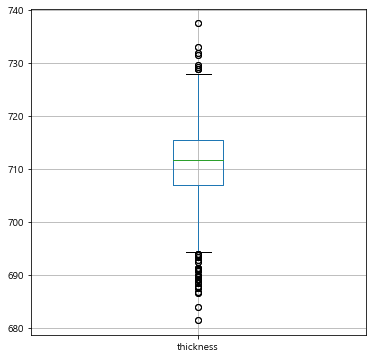

In [21]:
Ox_data.boxplot('thickness',figsize= (6,6))

<AxesSubplot:>

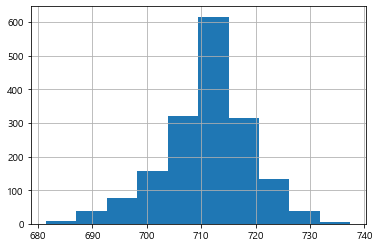

In [27]:
Ox_data['thickness'].hist()

<AxesSubplot:>

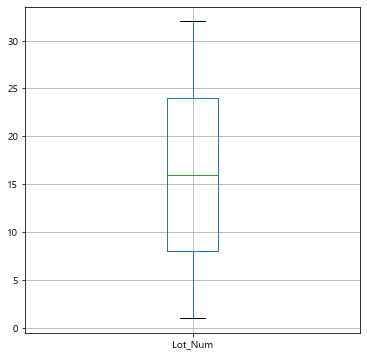

In [22]:
Ox_data.boxplot('Lot_Num',figsize= (6,6))

<AxesSubplot:>

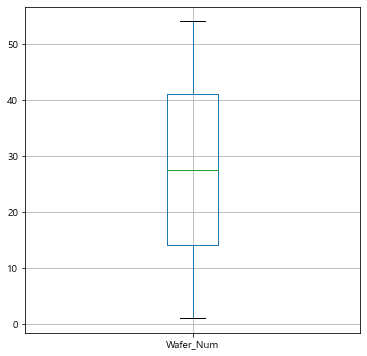

In [23]:
Ox_data.boxplot('Wafer_Num',figsize= (6,6))

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ox_Chamber', ylabel='count'>

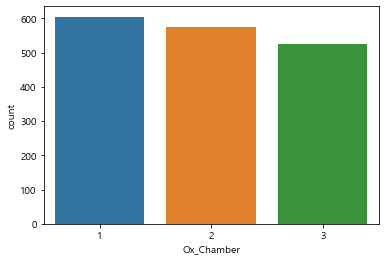

In [29]:
sns.countplot(Ox_data['Ox_Chamber'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

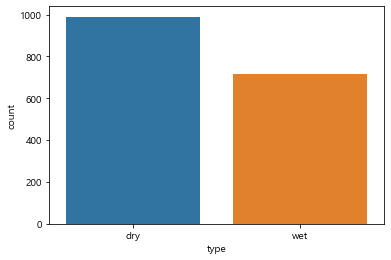

In [32]:
sns.countplot(Ox_data['type'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vapor', ylabel='count'>

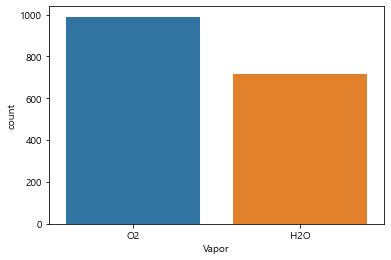

In [33]:
sns.countplot(Ox_data['Vapor'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='process', ylabel='count'>

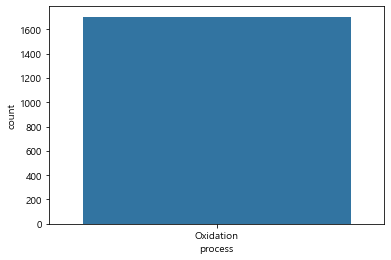

In [41]:
sns.countplot(Ox_data['process'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Datetime', ylabel='count'>

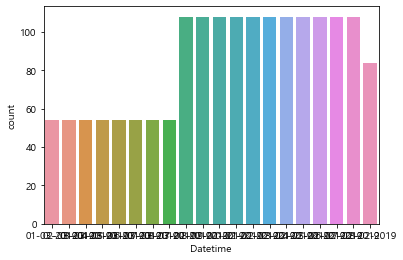

In [34]:
sns.countplot(Ox_data['Datetime'])